Listing 4.11 Loading the Reuters dataset

# Multiclass classification problem

In [1]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2022-11-08 16:49:51.011472: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
len(train_data)

8982

In [3]:
len(test_data)

2246

In [4]:
len(train_data[10])

31

In [5]:
word_index = reuters.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in     train_data[0]])

In [6]:
train_labels[10]

3

In [7]:
import numpy as np

def vectorize_sequences(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i,j] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [8]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1. 
    return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [9]:
from keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

Here softmax activation will create an array of 46 dimensions which sum up to 1.0

In [10]:
from tensorflow import keras
from keras import layers

LAYER1_DIM = 60
LAYER2_DIM = 60

model = keras.Sequential([
    layers.Dense(LAYER1_DIM, activation="relu"),
    layers.Dense(LAYER2_DIM, activation="relu"),
    layers.Dense(46, activation="softmax")
])

2022-11-08 16:49:59.294314: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.



categorical_crossentropy: measures the distance between two probability distributions: 
1. probability distribution output by the model
2. he true distribution of the labels

In [11]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [12]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [13]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 45ms/step - loss: 2.7262 - accuracy: 0.4481 - val_loss: 1.7935 - val_accuracy: 0.6470
Epoch 2/20
16/16 [==============================] - 0s 25ms/step - loss: 1.4399 - accuracy: 0.7075 - val_loss: 1.2799 - val_accuracy: 0.7230
Epoch 3/20
16/16 [==============================] - 0s 31ms/step - loss: 1.0423 - accuracy: 0.7805 - val_loss: 1.1131 - val_accuracy: 0.7500
Epoch 4/20
16/16 [==============================] - 0s 23ms/step - loss: 0.8245 - accuracy: 0.8269 - val_loss: 1.0154 - val_accuracy: 0.7900
Epoch 5/20
16/16 [==============================] - 0s 23ms/step - loss: 0.6564 - accuracy: 0.8621 - val_loss: 0.9694 - val_accuracy: 0.7940
Epoch 6/20
16/16 [==============================] - 0s 28ms/step - loss: 0.5310 - accuracy: 0.8875 - val_loss: 0.9122 - val_accuracy: 0.8070
Epoch 7/20
16/16 [==============================] - 0s 23ms/step - loss: 0.4320 - accuracy: 0.9104 - val_loss: 0.9029 - val_accuracy: 0.8090
Epoch 8/20
16

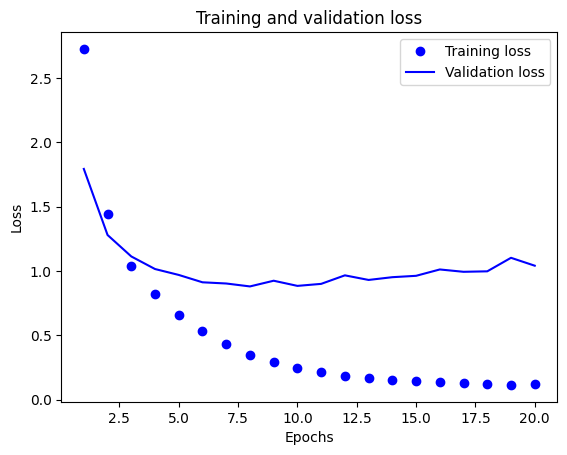

In [14]:
import matplotlib.pyplot as plt

loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

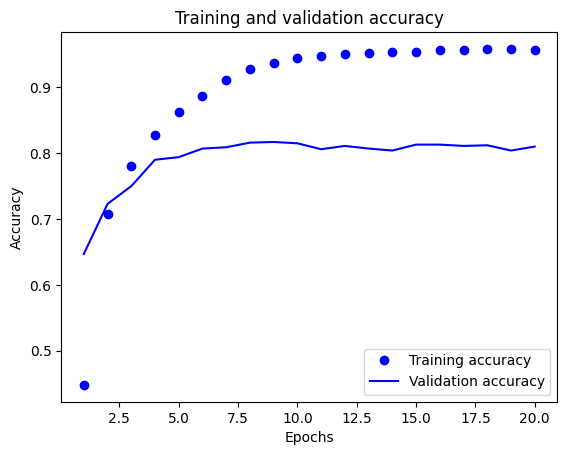

In [15]:
plt.clf()                         
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

The model begins to overfit after nine epochs. Let’s train a new model from scratch for nine epochs and then evaluate it on the test set.

In [16]:
model = keras.Sequential([
    layers.Dense(LAYER1_DIM, activation="relu"),
    layers.Dense(LAYER2_DIM, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/9
18/18 [==============================] - 1s 22ms/step - loss: 2.5530 - accuracy: 0.5415
Epoch 2/9
18/18 [==============================] - 0s 17ms/step - loss: 1.3848 - accuracy: 0.7032
Epoch 3/9
18/18 [==============================] - 0s 18ms/step - loss: 1.0358 - accuracy: 0.7739
Epoch 4/9
18/18 [==============================] - 0s 18ms/step - loss: 0.8139 - accuracy: 0.8243
Epoch 5/9
18/18 [==============================] - 0s 17ms/step - loss: 0.6455 - accuracy: 0.8644
Epoch 6/9
18/18 [==============================] - 0s 17ms/step - loss: 0.5148 - accuracy: 0.8903
Epoch 7/9
18/18 [==============================] - 0s 17ms/step - loss: 0.4211 - accuracy: 0.9125
Epoch 8/9
18/18 [==============================] - 0s 17ms/step - loss: 0.3399 - accuracy: 0.9272
Epoch 9/9
71/71 [==============================] - 0s 2ms/step - loss: 0.9534 - accuracy: 0.7916


In [17]:
results

[0.9534055590629578, 0.7916295528411865]